In [4]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import linkage, dendrogram

import gensim
from gensim.scripts.glove2word2vec import glove2word2vec

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 10

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)


In [6]:
import os
import urllib.request
import zipfile

# Creează folderul data/ dacă nu există
if not os.path.exists("data"):
    os.makedirs("data")
    print("Folder 'data' creat.")
else:
    print("Folder 'data' există deja.")

# === Download GloVe ===
glove_zip_url = "https://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = "data/glove.6B.zip"

if not os.path.exists(glove_zip_path):
    print("Downloading GloVe embeddings...")
    urllib.request.urlretrieve(glove_zip_url, glove_zip_path)
    print("Downloaded glove.6B.zip.")
else:
    print("glove.6B.zip deja există.")

# Dezarhivează dacă fișierele lipsesc
if not os.path.exists("data/glove.6B.50d.txt"):
    print("Extracting GloVe files...")
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall("data")
    print("Extracted GloVe embeddings.")
else:
    print("GloVe .txt files deja există.")

print("\nGloVe download & extraction completed!")


Folder 'data' există deja.
glove.6B.zip deja există.
GloVe .txt files deja există.

GloVe download & extraction completed!


In [7]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import linkage, dendrogram

import gensim
from gensim.scripts.glove2word2vec import glove2word2vec

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 10

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)


In [8]:
import gensim
import gensim.downloader as api
from gensim.scripts.glove2word2vec import glove2word2vec
import os

GLOVE_TXT_PATH = "data/glove.6B.50d.txt"
GLOVE_W2V_PATH = "data/glove.6B.50d.word2vec.txt"

if not os.path.exists(GLOVE_W2V_PATH):
    print("Convertesc GloVe la format word2vec...")
    glove2word2vec(GLOVE_TXT_PATH, GLOVE_W2V_PATH)
    print("Conversie GloVe -> word2vec terminată.")
else:
    print("Fișierul GloVe în format word2vec există deja.")

print("Încarc modelul GloVe...")
glove_model = gensim.models.KeyedVectors.load_word2vec_format(GLOVE_W2V_PATH, binary=False)
print(f"GloVe loaded. Vector size: {glove_model.vector_size}, vocab size: {len(glove_model.key_to_index)}")

print("Încarc modelul Word2Vec (Google News, 300d) prin gensim.downloader...")
w2v_model = api.load("word2vec-google-news-300")
print(f"Word2Vec loaded. Vector size: {w2v_model.vector_size}, vocab size: {len(w2v_model.key_to_index)}")


Convertesc GloVe la format word2vec...


/tmp/ipykernel_10813/989164438.py:11: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(GLOVE_TXT_PATH, GLOVE_W2V_PATH)


Conversie GloVe -> word2vec terminată.
Încarc modelul GloVe...
GloVe loaded. Vector size: 50, vocab size: 400000
Încarc modelul Word2Vec (Google News, 300d) prin gensim.downloader...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Word2Vec loaded. Vector size: 300, vocab size: 3000000


In [9]:
visual_words = [
    "king", "queen", "man", "woman",
    "paris", "france", "berlin", "germany",
    "apple", "banana",
    "dog", "cat",
    "car", "bus",
    "city", "village",
    "happy", "sad",
    "big", "small"
]

cluster_words = [
    "king", "queen", "man", "woman",
    "paris", "france", "berlin", "germany",
    "madrid", "spain",
    "apple", "banana", "orange",
    "dog", "cat", "lion", "tiger",
    "car", "bus", "train", "bicycle",
    "city", "village", "country"
]

related_pairs = [
    ("king", "queen"),
    ("car", "bus"),
    ("city", "village"),
]

unrelated_pairs = [
    ("king", "banana"),
    ("city", "dog"),
]

def available_words(model, words):
    present = [w for w in words if w in model.key_to_index]
    missing = [w for w in words if w not in model.key_to_index]
    if missing:
        print("Cuvinte lipsă în vocabular:", missing)
    return present

def words_to_matrix(model, words):
    return np.vstack([model[w] for w in words])

def plot_2d(points_2d, words, title):
    x = points_2d[:, 0]
    y = points_2d[:, 1]
    plt.figure()
    plt.scatter(x, y)
    for i, w in enumerate(words):
        plt.annotate(w, (x[i], y[i]))
    plt.title(title)
    plt.xlabel("dim 1")
    plt.ylabel("dim 2")
    plt.show()

from mpl_toolkits.mplot3d import Axes3D

def plot_3d(points_3d, words, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xs = points_3d[:, 0]
    ys = points_3d[:, 1]
    zs = points_3d[:, 2]
    ax.scatter(xs, ys, zs)
    for i, w in enumerate(words):
        ax.text(xs[i], ys[i], zs[i], w)
    ax.set_title(title)
    ax.set_xlabel("dim 1")
    ax.set_ylabel("dim 2")
    ax.set_zlabel("dim 3")
    plt.show()


GloVe: folosesc dimensiunile random [13 39 30]


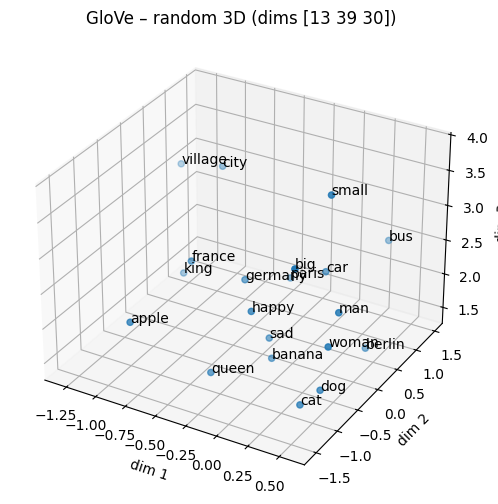

Word2Vec: folosesc dimensiunile random [194 157 225]


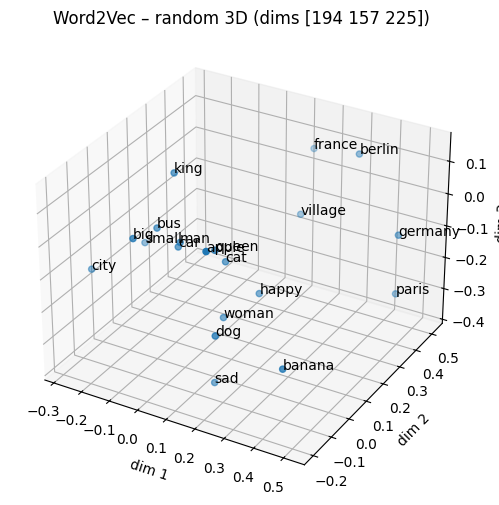

In [10]:
def random_3d_projection(model, words, model_name):
    words_avail = available_words(model, words)
    X = words_to_matrix(model, words_avail)
    d = model.vector_size
    dims = np.random.choice(d, size=3, replace=False)
    print(f"{model_name}: folosesc dimensiunile random {dims}")

    X_proj = X[:, dims]
    plot_3d(X_proj, words_avail, f"{model_name} – random 3D (dims {dims})")

random_3d_projection(glove_model, visual_words, "GloVe")

random_3d_projection(w2v_model, visual_words, "Word2Vec")


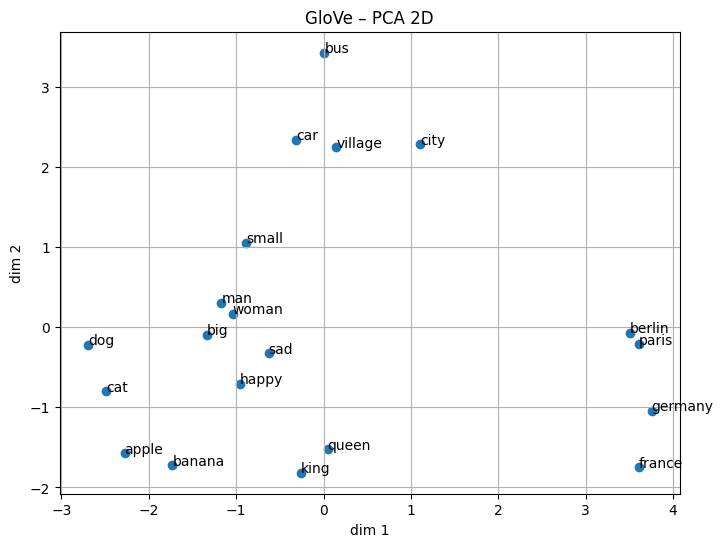

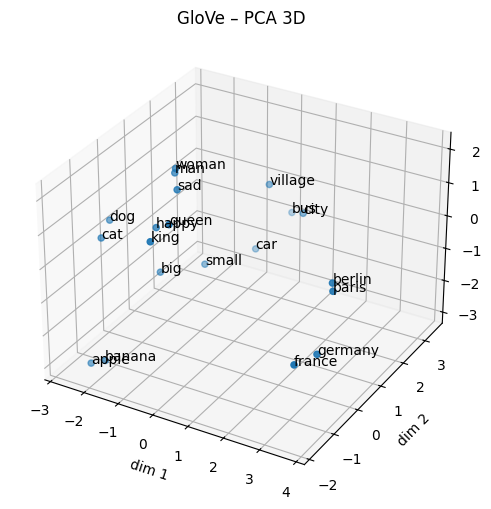

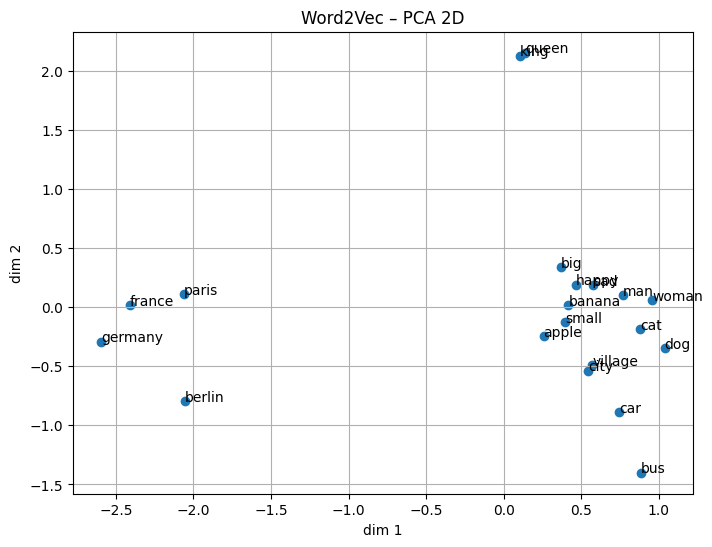

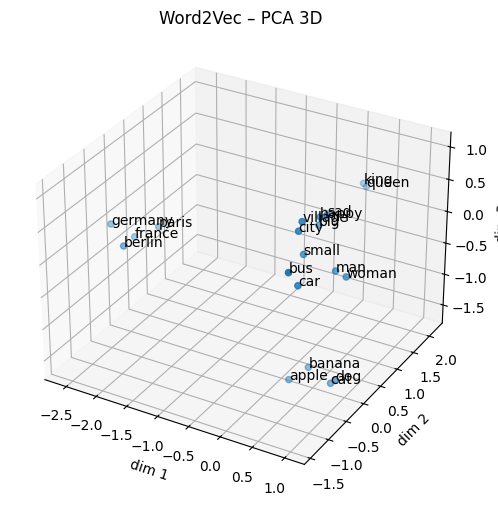

In [11]:
def pca_projection(model, words, model_name):
    words_avail = available_words(model, words)
    X = words_to_matrix(model, words_avail)

    pca_2d = PCA(n_components=2, random_state=RANDOM_SEED)
    X_2d = pca_2d.fit_transform(X)
    plot_2d(X_2d, words_avail, f"{model_name} – PCA 2D")

    if X.shape[1] >= 3:
        pca_3d = PCA(n_components=3, random_state=RANDOM_SEED)
        X_3d = pca_3d.fit_transform(X)
        plot_3d(X_3d, words_avail, f"{model_name} – PCA 3D")

pca_projection(glove_model, visual_words, "GloVe")

pca_projection(w2v_model, visual_words, "Word2Vec")


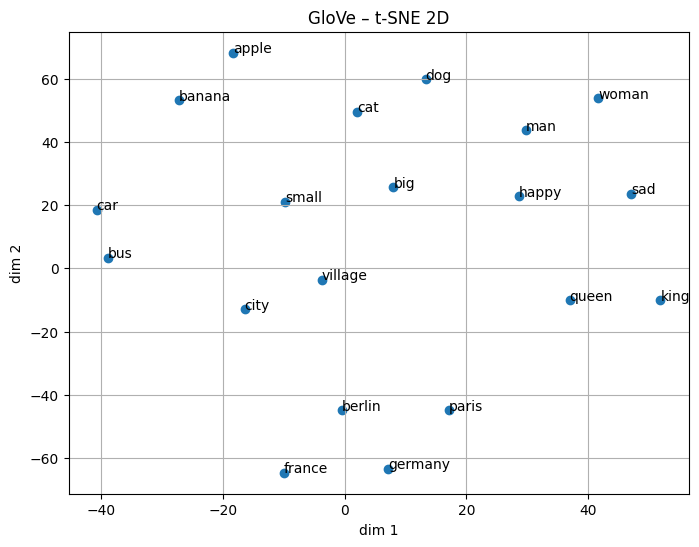

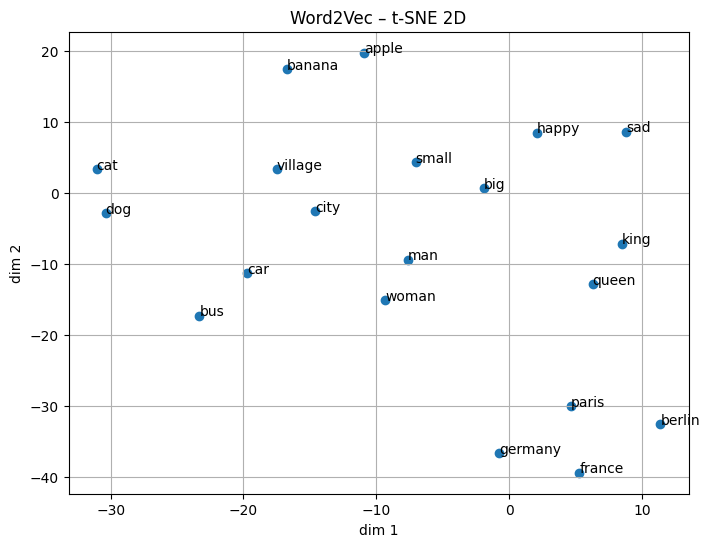

In [12]:
def tsne_projection(model, words, model_name, perplexity=10):
    words_avail = available_words(model, words)
    X = words_to_matrix(model, words_avail)

    tsne = TSNE(
        n_components=2,
        perplexity=min(perplexity, len(words_avail) - 1),
        random_state=RANDOM_SEED,
        init="random",
        learning_rate="auto"
    )
    X_2d = tsne.fit_transform(X)
    plot_2d(X_2d, words_avail, f"{model_name} – t-SNE 2D")

tsne_projection(glove_model, visual_words, "GloVe")

tsne_projection(w2v_model, visual_words, "Word2Vec")


In [13]:
def print_similarities(model, model_name, rel_pairs, unrel_pairs):
    print(f"=== Cosine similarities for {model_name} ===")
    print("Cuvinte înrudite:")
    for w1, w2 in rel_pairs:
        if w1 in model.key_to_index and w2 in model.key_to_index:
            sim = model.similarity(w1, w2)
            print(f"  {w1:>8} – {w2:<8} : {sim:.4f}")
        else:
            print(f"  {w1} – {w2} : (cel puțin unul lipsește din vocabular)")

    print("\nCuvinte neînrudite:")
    for w1, w2 in unrel_pairs:
        if w1 in model.key_to_index and w2 in model.key_to_index:
            sim = model.similarity(w1, w2)
            print(f"  {w1:>8} – {w2:<8} : {sim:.4f}")
        else:
            print(f"  {w1} – {w2} : (cel puțin unul lipsește din vocabular)")
    print()

print_similarities(glove_model, "GloVe", related_pairs, unrelated_pairs)

print_similarities(w2v_model, "Word2Vec", related_pairs, unrelated_pairs)


=== Cosine similarities for GloVe ===
Cuvinte înrudite:
      king – queen    : 0.7839
       car – bus      : 0.8211
      city – village  : 0.7453

Cuvinte neînrudite:
      king – banana   : 0.2207
      city – dog      : 0.2762

=== Cosine similarities for Word2Vec ===
Cuvinte înrudite:
      king – queen    : 0.6511
       car – bus      : 0.4693
      city – village  : 0.4790

Cuvinte neînrudite:
      king – banana   : 0.1365
      city – dog      : 0.1508



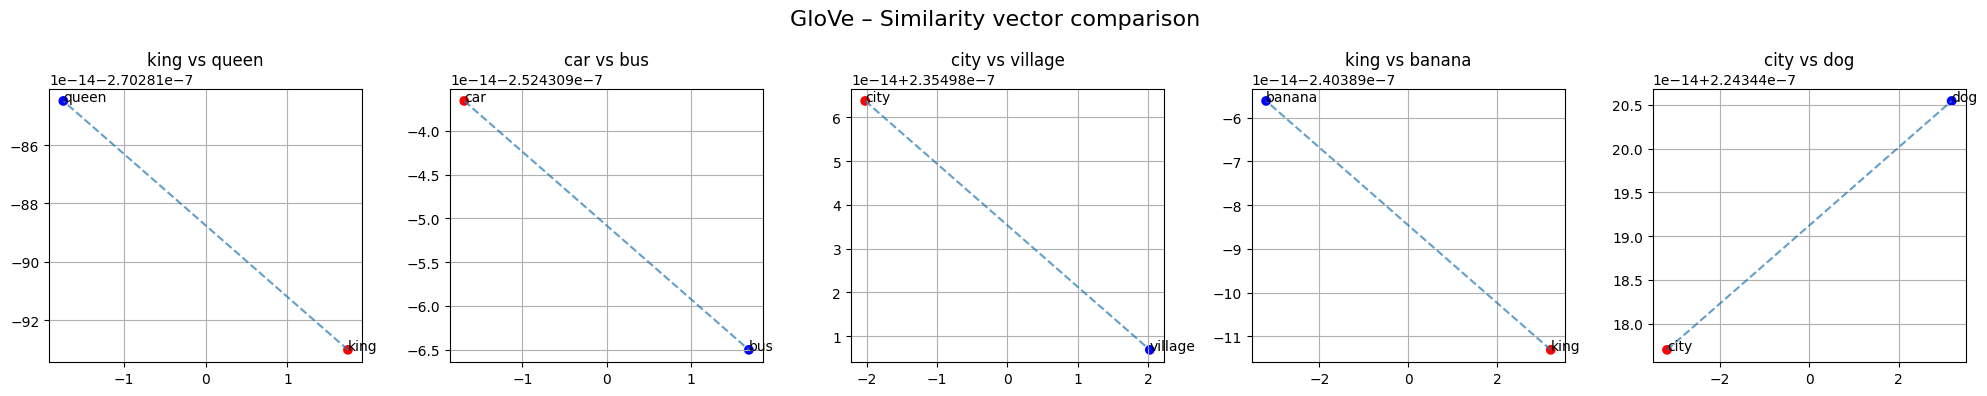

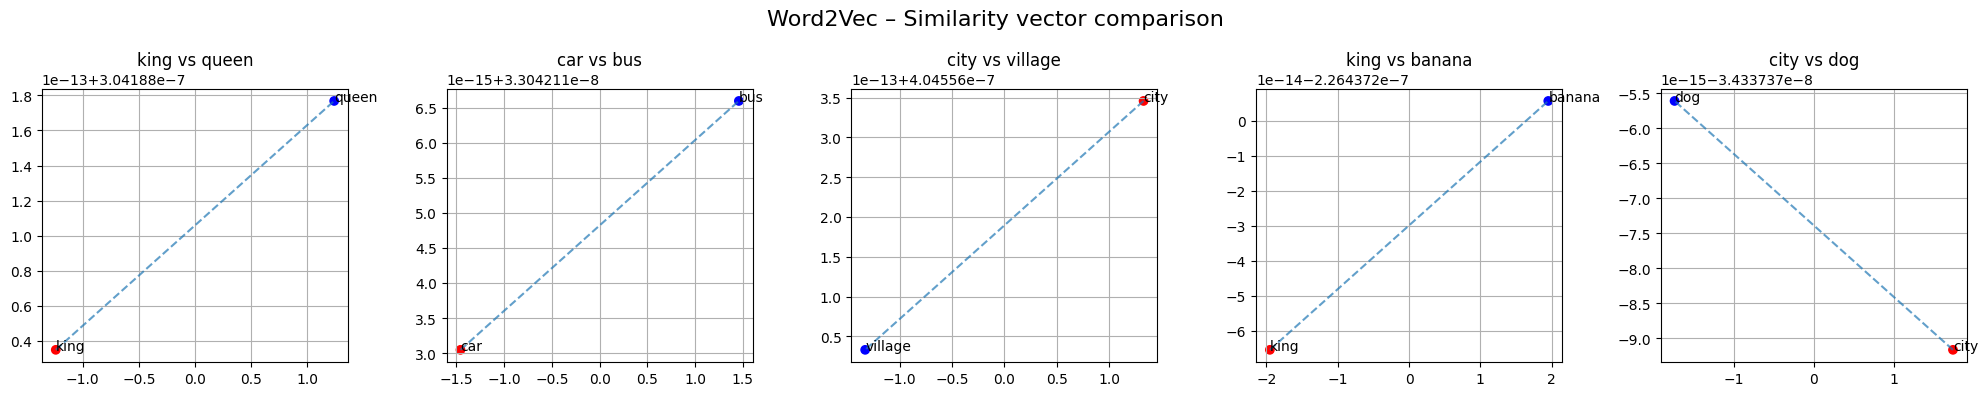

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def plot_similarity_pairs(model, related, unrelated, title):
    pairs = related + unrelated
    labels = [f"{a}–{b}" for (a,b) in pairs]

    fig, axes = plt.subplots(1, len(pairs), figsize=(4*len(pairs), 4))

    for idx, (w1, w2) in enumerate(pairs):
        if w1 not in model.key_to_index or w2 not in model.key_to_index:
            axes[idx].set_title(f"{w1}, {w2} missing")
            axes[idx].axis("off")
            continue

        X = np.vstack([model[w1], model[w2]])

        pca = PCA(n_components=2)
        pts = pca.fit_transform(X)

        ax = axes[idx]
        ax.scatter(pts[:,0], pts[:,1], color=["red","blue"])
        ax.set_title(f"{w1} vs {w2}")

        ax.annotate(w1, (pts[0,0], pts[0,1]))
        ax.annotate(w2, (pts[1,0], pts[1,1]))

        ax.plot(pts[:,0], pts[:,1], "--", alpha=0.7)

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


plot_similarity_pairs(
    glove_model,
    related_pairs,
    unrelated_pairs,
    "GloVe – Similarity vector comparison"
)

plot_similarity_pairs(
    w2v_model,
    related_pairs,
    unrelated_pairs,
    "Word2Vec – Similarity vector comparison"
)


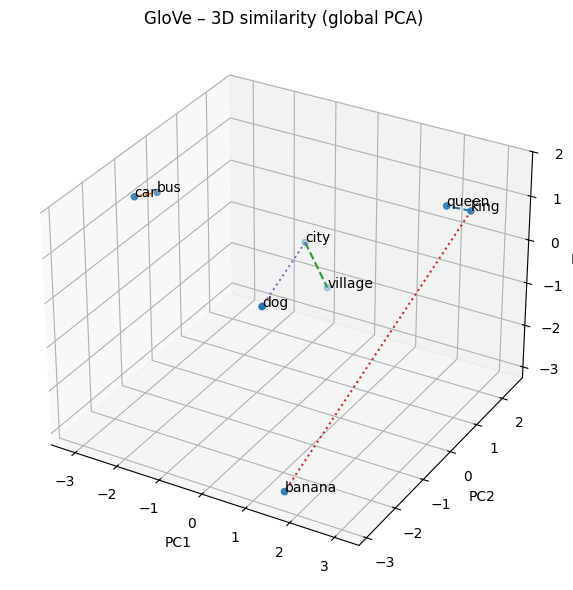

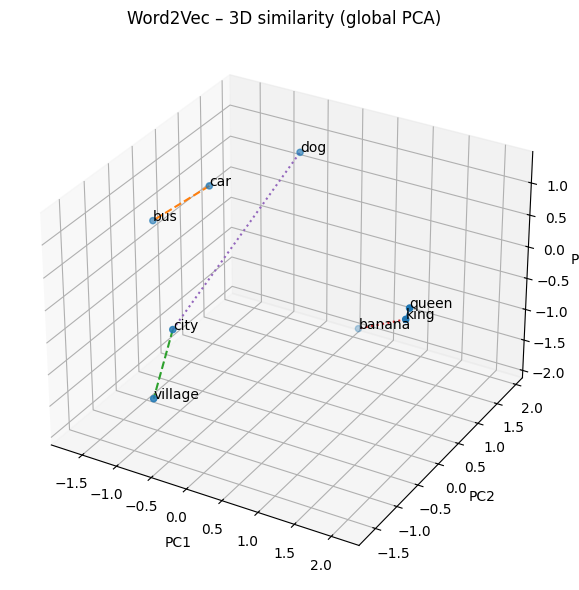

In [17]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def plot_similarity_pairs_3d_global(model, related, unrelated, title):

    all_words = sorted(set([w for pair in (related + unrelated) for w in pair]))
    all_words = [w for w in all_words if w in model.key_to_index]

    X = np.vstack([model[w] for w in all_words])

    pca = PCA(n_components=3)
    coords = pca.fit_transform(X)

    word2coord = {w: coords[i] for i, w in enumerate(all_words)}

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")

    xs = coords[:, 0]
    ys = coords[:, 1]
    zs = coords[:, 2]
    ax.scatter(xs, ys, zs)

    for w, (x, y, z) in word2coord.items():
        ax.text(x, y, z, w)

    for w1, w2 in related:
        if w1 in word2coord and w2 in word2coord:
            p1 = word2coord[w1]
            p2 = word2coord[w2]
            ax.plot([p1[0], p2[0]],
                    [p1[1], p2[1]],
                    [p1[2], p2[2]],
                    linestyle="--")

    for w1, w2 in unrelated:
        if w1 in word2coord and w2 in word2coord:
            p1 = word2coord[w1]
            p2 = word2coord[w2]
            ax.plot([p1[0], p2[0]],
                    [p1[1], p2[1]],
                    [p1[2], p2[2]],
                    linestyle=":")

    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    plt.tight_layout()
    plt.show()

plot_similarity_pairs_3d_global(glove_model, related_pairs, unrelated_pairs, "GloVe – 3D similarity (global PCA)")
plot_similarity_pairs_3d_global(w2v_model, related_pairs, unrelated_pairs, "Word2Vec – 3D similarity (global PCA)")


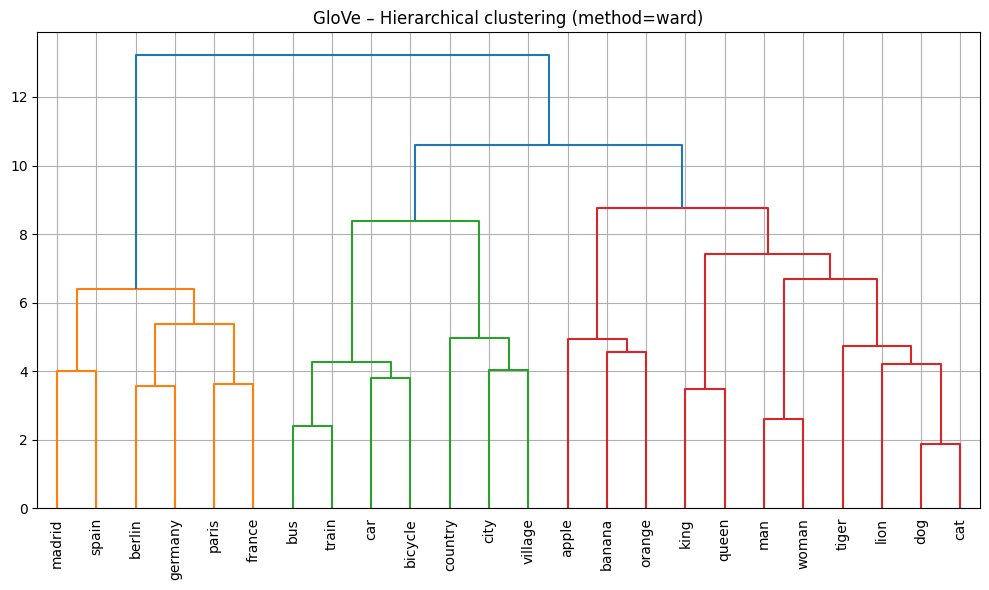

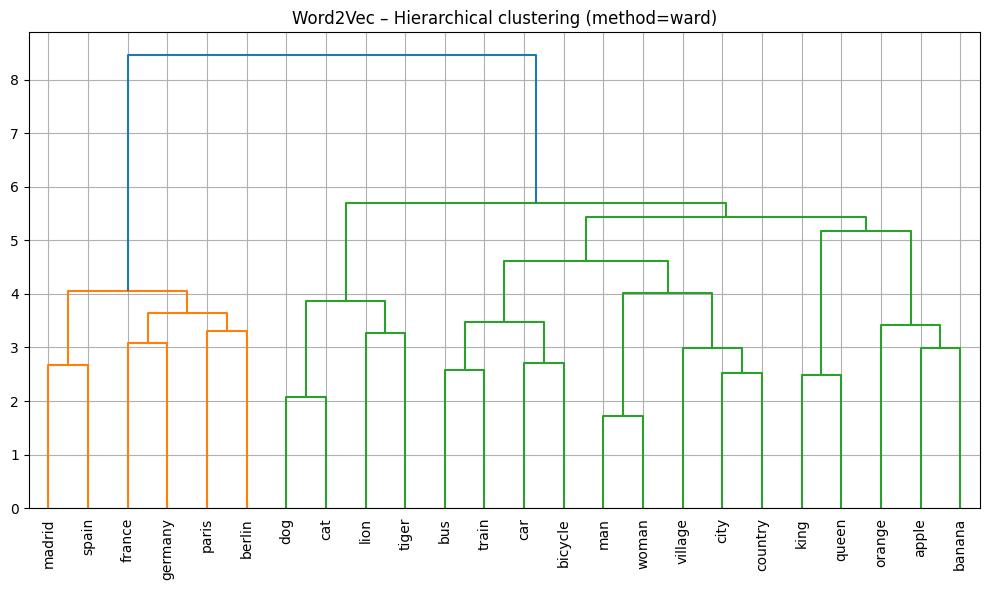

In [18]:
def hierarchical_clustering(model, words, model_name, method="ward"):
    words_avail = available_words(model, words)
    X = words_to_matrix(model, words_avail)

    Z = linkage(X, method=method)
    plt.figure(figsize=(10, 6))
    dendrogram(Z, labels=words_avail, leaf_rotation=90)
    plt.title(f"{model_name} – Hierarchical clustering (method={method})")
    plt.tight_layout()
    plt.show()

hierarchical_clustering(glove_model, cluster_words, "GloVe")

hierarchical_clustering(w2v_model, cluster_words, "Word2Vec")
